# [매일10분 데이터 분석] 파이썬 순서형 자료 시각화 ( 순서형 / 시간 데이터 )

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', family='Malgun Gothic')

In [7]:
# 렌탈 데이터 불러오기
f1 = pd.read_csv('data03.csv')
df1.head(2)

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

날짜 데이터인 datetime 컬럼이 object 타입으로 되어있다.

따라서 날짜형 데이터로 변환해야 할 필요가 있다.

In [10]:
df1.shape

(51304, 17)

In [11]:
# datetime 컬럼을 날짜 데이터로 변환
df1['datetime(timestmp)'] = pd.to_datetime(df1['datetime'])

### 1) 선 그래프(sns.lineplot)

<AxesSubplot:xlabel='datetime(timestmp)', ylabel='amount'>

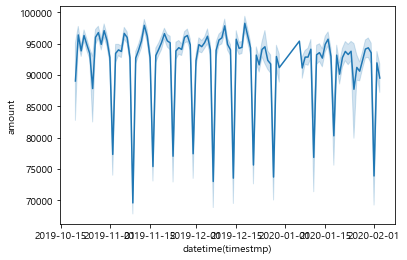

In [13]:
sns.lineplot(data=df1, x='datetime(timestmp)', y='amount')

일자별 평균 그래프가 출력된다.

하루 전체 매출이 어느 정도인가를 알기 위해서는 어떻게 해야 하는가?
- 총합을 계산해야한다.
- 위 그래프의 옅은 색으로 표시된 것은 신뢰구간이다. 신뢰구간을 없앤다.

#### 문제 발생

<AxesSubplot:xlabel='datetime(timestmp)', ylabel='amount'>

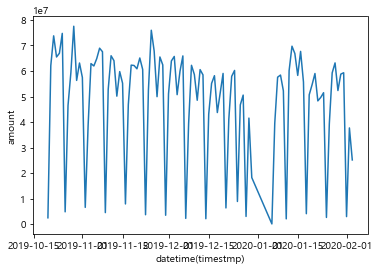

In [25]:
# 신뢰구간(ci) 제거 및 총합 그래프 추출
sns.lineplot(data=df1, x='datetime(timestmp)', y='amount', ci=None, estimator='sum')

날짜에서 어느 지점마다 **그래프가 아래로 꺼지는 현상**이 발생한다.

실제 실무에서는 이런 그래프 형식이 많이 나타난다.

그 이유를 알아보자.

#### 문제 해결 방법

In [20]:
# 날짜를 요일로 변환
df1['계약요일'] = df1['datetime(timestmp)'].dt.day_name()

<AxesSubplot:xlabel='계약요일', ylabel='amount'>

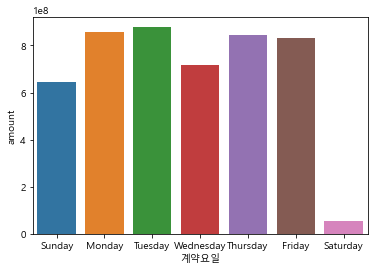

In [23]:
# 요일별 막대그래프 출력
sns.barplot(data=df1, x='계약요일', y='amount', ci=None, estimator=sum)

토요일에는 계약 빈도수가 매우 적다.

따라서 위의 **선 그래프에서 아래로 꺼지는 날짜는 토요일**이라는 것을 유추할 수 있다.

예를 들어 토요일에는 계약을 오전까지만 받는다던지 전산 시스템이 주말에는 점검을 해서 계약 건수가 일요일로 넘어간다던지 등등  
이런 이유로 위와 같은 결과가 나올 수 있다.

따라서 날짜를 일자별로 확인하는 것이 아닌 **주차별 또는 월별**로 확인할 수 있다.

In [33]:
# 날짜를 주차로 변환
df1['계약주차'] = df1['datetime(timestmp)'].dt.isocalendar().week

<AxesSubplot:xlabel='계약주차', ylabel='amount'>

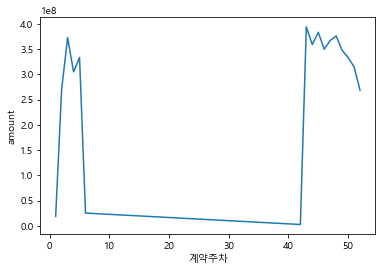

In [34]:
# 주차별 선 그래프 출력
sns.lineplot(data=df1, x='계약주차', y='amount', ci=None, estimator=sum)

In [36]:
df1['datetime(timestmp)'].describe()

<ipython-input-36-1cbe77f1e599>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1['datetime(timestmp)'].describe()


count                   51304
unique                    101
top       2019-10-29 00:00:00
freq                      817
first     2019-10-20 00:00:00
last      2020-02-03 00:00:00
Name: datetime(timestmp), dtype: object

2019년 10월 20일부터 2019년 12월 31일까지: 43주차부터 52주차까지

2020년 1월 1일부터 2020년 2월 3일까지: 1주차부터 6주차까지

이므로 그래프에서 데이터가 양 끝에 몰려있는 현상이 나타난다.

<AxesSubplot:xlabel='계약주차', ylabel='amount'>

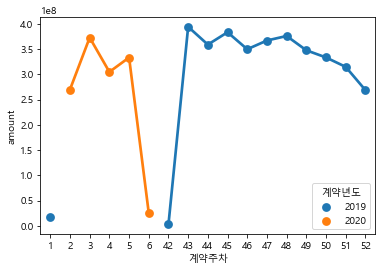

In [41]:
# 계약년도별(2019년, 2020년)로 나누어서 출력
df1['계약년도'] = df1['datetime(timestmp)'].dt.year # 연도 데이터 컬럼 생성
sns.pointplot(data=df1, x='계약주차', y='amount', ci=None, estimator=sum, hue='계약년도')

<AxesSubplot:xlabel='계약주차', ylabel='amount'>

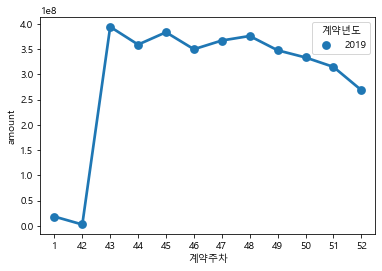

In [43]:
# 2019년도 데이터만 출력
cond1 = (df1['계약년도'] == 2019)
df2 = df1.loc[cond1]

sns.pointplot(data=df2, x='계약주차', y='amount', ci=None, estimator=sum, hue='계약년도')